In [6]:
%load_ext jupyter_black

In [7]:
import pandas as pd

In [10]:
df = pd.read_csv("data/facebook/reaction_counts.csv").assign(
    status_published=lambda df_: pd.to_datetime(
        df_["status_published"], format="ISO8601"
    )
)

In [15]:
# how many reactions did trump
df["num_reactions"].sum()

233609917

In [19]:
# count the posts by status_type
df["status_type"].value_counts()

status_type
photo     1539
status    1177
link       764
video      679
event        1
Name: count, dtype: int64

In [20]:
# count the posts by status_type (dist)
df["status_type"].value_counts(normalize=True)

status_type
photo     0.369952
status    0.282933
link      0.183654
video     0.163221
event     0.000240
Name: proportion, dtype: float64

<Axes: xlabel='status_type'>

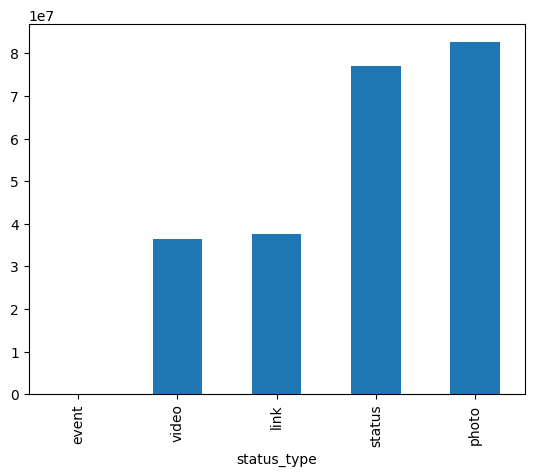

In [24]:
df.groupby("status_type")["num_reactions"].sum().sort_values().plot.bar()

In [26]:
df

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,153080620724_10157915294545725,Beautiful evening in Wisconsin- THANK YOU for ...,Timeline Photos,photo,https://www.facebook.com/DonaldTrump/photos/a....,2016-10-17 20:56:51,6813,543,359,6178,572,39,17,0,7
1,153080620724_10157914483265725,The State Department's quid pro quo scheme pro...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,2016-10-17 18:00:41,33768,3644,17653,26649,487,1155,75,191,5211
2,153080620724_10157913199155725,Crooked Hillary's State Department colluded wi...,NaN,video,https://www.facebook.com/DonaldTrump/videos/10...,2016-10-17 15:34:46,85627,8810,32594,73519,2943,1020,330,263,7552
3,153080620724_10157912962325725,"JournoCash: Media gives $382,000 to Clinton, $...","JournoCash: Media gives $382,000 to Clinton, $...",link,http://www.washingtonexaminer.com/journocash-m...,2016-10-17 14:17:24,22696,3665,5082,14029,122,2091,241,286,5927
4,153080620724_10157912187170725,"Exclusive: ""O'Keefe Video Sting Exposes 'Bird-...",O'Keefe Reveals 'Bird-Dogging' to Incite Viole...,link,http://www.breitbart.com/big-government/2016/1...,2016-10-17 12:03:19,40729,4905,17087,26472,178,2588,154,417,10922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,153080620724_86348879816,- Check out the official website for Donald Tr...,NaN,status,NaN,2009-04-20 08:44:07,152,43,3,152,0,0,0,0,0
4156,153080620724_96770601006,- Who do you think will be fired on Celebrity ...,NaN,status,NaN,2009-04-19 17:18:16,140,111,6,140,0,0,0,0,0
4157,153080620724_85435041544,Follow Donald J. Trump on Twitter: http://twit...,NaN,status,NaN,2009-04-16 17:44:23,137,60,2,137,0,0,0,0,0
4158,153080620724_71666378535,Watch Donald J. Trump on Larry King Live: http...,NaN,status,NaN,2009-04-16 10:05:34,136,66,0,136,0,0,0,0,0


<Axes: xlabel='status_type'>

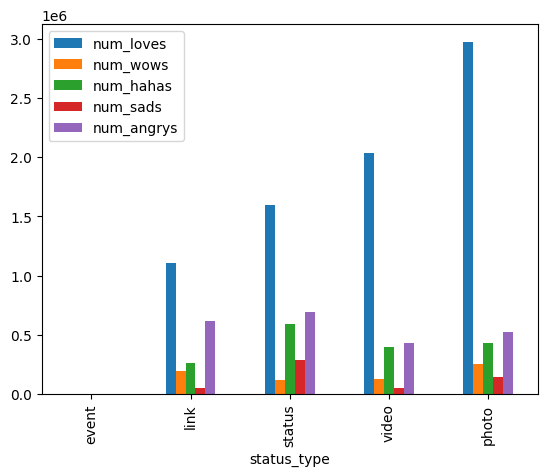

In [38]:
df.groupby("status_type")[
    [
        # "num_likes",
        "num_loves",
        "num_wows",
        "num_hahas",
        "num_sads",
        "num_angrys",
    ]
].sum().sort_values("num_loves").plot.bar()

/var/folders/l5/kgrw0xy156z2lt7wy2wvprt80000gp/T/ipykernel_30797/911986796.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.set_index("status_published").resample("1y")["num_reactions"].sum().plot()


<Axes: xlabel='status_published'>

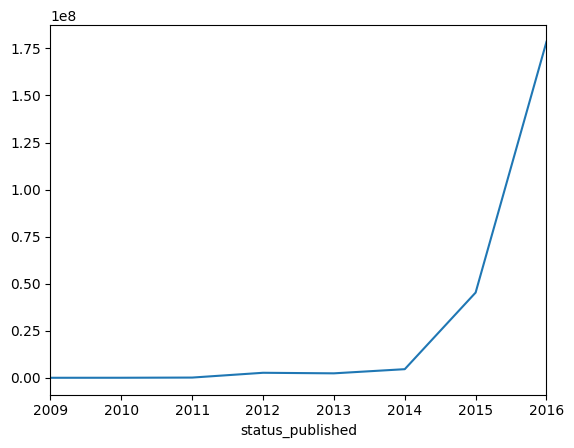

In [44]:
df.set_index("status_published").resample("1y")["num_reactions"].sum().plot()

/var/folders/l5/kgrw0xy156z2lt7wy2wvprt80000gp/T/ipykernel_30797/2140270847.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df.set_index("status_published").resample("1w")["num_reactions"].sum().plot()


<Axes: xlabel='status_published'>

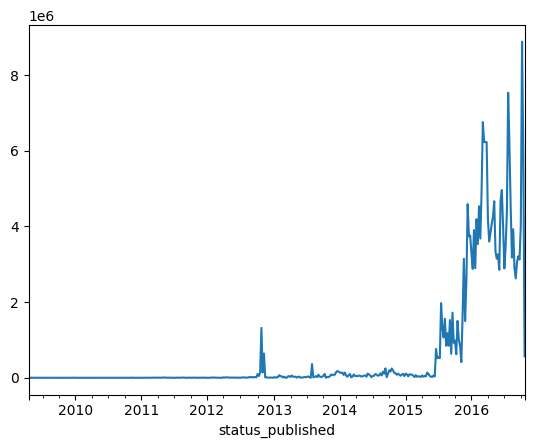

In [51]:
df.set_index("status_published").resample("1w")["num_reactions"].sum().plot()